In [1]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf


# Data Description


1. 가격 예측시, 수입용도, 수입형태 등 제공데이터와 동일하게 세분화하여 제출하여야 하나요?
- 상세 어종별 평균단가를 예측하시면 됩니다.
2. 각 용어의 의미는?
- 수출국 : 원료를 수입하여 가공 후 반제품 또는 최종제품형태로 제조하여 수출하는 국가
- 제조국 : 원료를 생산 또는 생산·가공하는 국가 (예시) ① 명태포(필렛)의 경우, 원료의 제조국(원산지)은 러시아지만, 필렛으로 가공하여 한국으로 수출 시 수출국은 중국입니다. 이 경우, 제조국(원산지) – 러시아, 수출국 – 중국입니다. ② 러시아산 명태를 중국에서 단순 명태포(필렛)으로 가공하고, 반제품 형태로 일본으로 수출, 일본에서 최종제품 형태로 제조 후 수 한국으로 수출한 경우, 수출국은 일본으로 표시됩니다. 이 경우, 제조국(원산지) – 러시아, 수출국 – 일본입니다. 단순히 원료형태로 수입하는 경우, “제조국(원산지) = 수출국”입니다. ③ 러시아에서 명태를 원료를 수입한 경우, 제조국(원산지), 수출국 모두 러시아입니다.
- 수입용도_반송품 : 국내 통관이 되지 않고 제3국으로 수출될 경우(중계무역)로 대부분 수입가격은 기재되지 않지만 제3국 거래당사자가 가격표시를 요청할 경우 가격을 표시함
- 수입용도_자사제품제조용 : 제조공장이 직접 수입한 경우로, 수입한 수산물을 통관 후 유통·판매하는 것이 아니라 자사의 제품원료로 사용할 목적으로 수입하였을 때 자사제품제조용으로 분류 (예시) 골뱅이의 경우, 제조사 통조림 제품의 원료로 사용할 목적(자사제품제조용)으로 수입하였으며, 원료의 형태로 재판매하지 않음
- 수입용도_외화획득용 원료 : 외화획득을 목적으로 생산에 필요한 원료로 수출을 목적으로 제품을 생산하기 위해 수입한 원료를 뜻함 (예시) 스페인산 다랑어를 수입하여, 한국에서 스테이크용으로 절단 가공한 후 다시 EU로 수출하는 경우, 스페인산 다랑어는 외화획득용 원료임
3. 평균단가의 단위 및 기준은?
- 미국달러($)/kg 입니다.
- 데이터는 대한민국이 기준으로, 제조국 또는 수출국의 판매자가 대한민국의 수입자에게 파는 가격을 기준으로 합니다.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx')

In [13]:
data.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [14]:
# 데이터를 확인하기 쉽게 column 명을 바꿔준다.
data = data.rename(columns = {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

# target값은 ($)로 나타낸 값이다.

In [15]:
data.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [16]:
# 이번에는 화살 오징어를 하나하나 살펴보도록 하자.
data = data[data['상세어종'] == '화살오징어'].reset_index(drop = True)
data

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target
0,2015-12-28,수산물,베트남,베트남,판매용,연체류 해물모듬,오징어,화살오징어,건조,23.890972
1,2015-12-28,수산물,베트남,베트남,판매용,연체류 해물모듬,오징어,화살오징어,"냉동,다리,포장횟감",8.929412
2,2015-12-28,수산물,베트남,베트남,판매용,연체류 해물모듬,오징어,화살오징어,"냉동,슬라이스(S),포장횟감",11.717870
3,2016-01-04,수산물,태국,태국,판매용,연체류 해물모듬,오징어,화살오징어,"냉동,슬라이스(S),포장횟감",13.978644
4,2016-01-04,수산물,베트남,베트남,판매용,연체류 해물모듬,오징어,화살오징어,"냉동,슬라이스(S),포장횟감",11.811334
...,...,...,...,...,...,...,...,...,...,...
507,2019-12-09,수산물,베트남,베트남,판매용,연체류 해물모듬,오징어,화살오징어,"냉동,슬라이스(S),포장횟감",13.060191
508,2019-12-16,수산물,베트남,베트남,판매용,연체류 해물모듬,오징어,화살오징어,건조,33.010052
509,2019-12-23,수산물,베트남,베트남,판매용,연체류 해물모듬,오징어,화살오징어,건조,31.924972
510,2019-12-30,수산물,베트남,베트남,판매용,연체류 해물모듬,오징어,화살오징어,"냉동,슬라이스(S),포장횟감",9.725806


# Data EDA

In [17]:
# 각 데이터를 시간별로 나눠주기
data['year'] = data['기준일'].dt.year
data['month'] = data['기준일'].dt.month
data['day'] = data['기준일'].dt.day

In [20]:
data.groupby('기준일')['target'].mean()

기준일
2015-12-28    14.846085
2016-01-04    17.052749
2016-01-11    18.925993
2016-01-18    18.060468
2016-01-25    19.400002
                ...    
2019-12-02    21.525076
2019-12-09    17.213630
2019-12-16    33.010052
2019-12-23    31.924972
2019-12-30     8.719570
Name: target, Length: 201, dtype: float64

Text(0.5, 1.0, 'lineplot target')

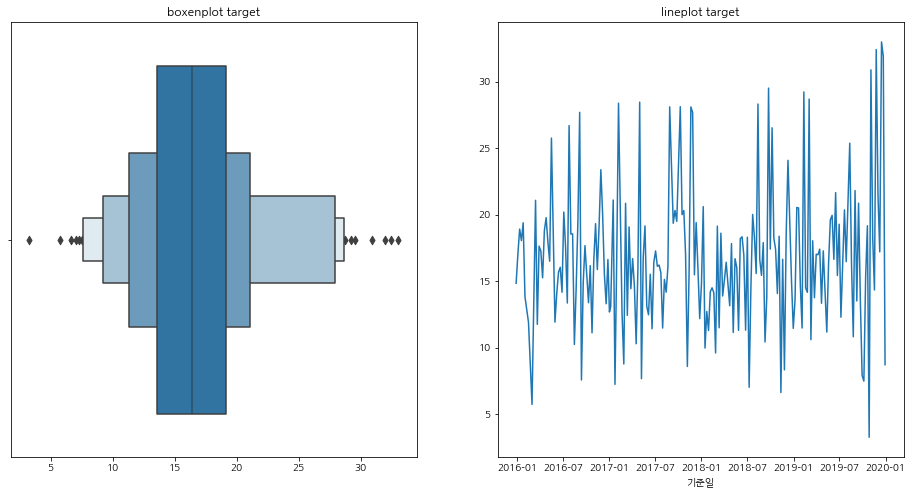

In [29]:
# groupby를 한 데이터를 하나 저장해준다.
plot_data = data.groupby('기준일')['target'].mean()

# 각 데이터를 test데이터와 맞춰서 종속변수를 확인해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.boxenplot(plot_data.values, ax = ax[0])
sns.lineplot(data = plot_data,x = plot_data.index,y = plot_data.values , ax = ax[1])

ax[0].set_title('boxenplot target')
ax[1].set_title('lineplot target')